# Auto Regressive Integrated Moving Average Model and Support Vector Machine
This file aims to compare the ARIMA and SVM predictors.
References:
 - https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
 - https://doi.org/10.1016/S0169-7439(03)00111-4

In [1]:
import gsod
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pmdarima as pm

gsod.enable_svg_graphing()

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
STATION = "722860"
ds = gsod.GsodDataset("runtime/GSOD")
filled = ds.read_continuous(stn=STATION, year="????", fill="ffill")
filled.describe().T

,count,mean,std,min,25%,50%,75%,max
STN,32385.0,722860.000000,0.000000,722860.0,722860.0,722860.0,722860.0,722860.00
WBAN,32385.0,27456.185734,17738.133352,23119.0,23119.0,23119.0,23119.0,99999.00
TEMP,32385.0,62.592605,11.069266,31.1,53.9,61.5,71.3,105.40
COUNT_TEMP,32385.0,23.368813,2.849392,4.0,24.0,24.0,24.0,24.00
DEWP,31302.0,43.874864,11.607134,-14.4,37.5,46.1,52.4,73.70
COUNT_DEWP,32385.0,23.055334,4.407043,0.0,24.0,24.0,24.0,24.00
SLP,32038.0,1014.893985,3.928529,994.3,1012.1,1014.4,1017.5,1032.80
COUNT_SLP,32385.0,18.953528,7.226966,0.0,8.0,24.0,24.0,24.00
STP,15722.0,960.598588,3.404823,939.4,958.3,960.2,962.7,975.40
COUNT_STP,32385.0,9.315393,10.875566,0.0,0.0,0.0,24.0,24.00


In [3]:
temp = filled["TEMP"]
length = len(temp)
train = temp[:int(length * 0.7)]

## ARIMA

In [4]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=120195.324, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=173225.333, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=121012.844, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=149775.456, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=252379.867, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=120167.664, Time=3.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=120350.150, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=118815.364, Time=6.80 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=119953.489, Time=0.54 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=118809.659, Time=7.28 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=118974.388, Time=6.25 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=118823.399, Time=8.46 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=118832.840, Time=7.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=118933.246, Time=3.69 sec

Best

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                22669
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -59397.830
Date:                Wed, 08 Sep 2021   AIC                         118809.659
Time:                        21:50:16   BIC                         118865.860
Sample:                             0   HQIC                        118827.935
                              - 22669                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1965      0.023      8.594      0.000       0.152       0.241
ar.L1          1.9727      0.021     91.859      0.000       1.931       2.015
ar.L2         -1.2746      0.040    -31.903      0.000      -1.353      -1.196
ar.L3          0.2988      0.019     15.498      0.000       0.261       0.337
ma.L1         -0.8993      0.022    -40.712      0.000      -0.943      -0.856
ma.L2          0.0265      0.022      1.211      0.226      -0.016       0.069
sigma2        10.9708      0.088    124.912      0.000      10.799      11.143
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               583.48
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
_ = model.plot_diagnostics()

/Users/zmy/.miniforge3/envs/tfmacos/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, -50, 'MAE: 9.346${}^\\circ$F\nRMSE: 11.17${}^\\circ$F')

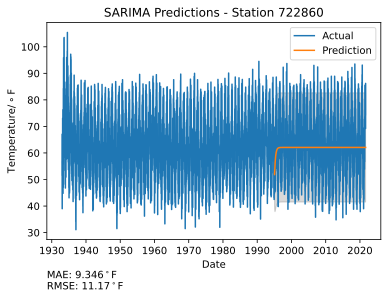

In [6]:
# Forecast
n_periods = length - len(train)
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = filled.index[-n_periods:]

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(temp, label="Actual")
plt.plot(fc_series, label="Prediction")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Temperature/${}\circ$F")
plt.title(f"SARIMA Predictions - Station {STATION}")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.annotate(
    f"MAE: {np.average(np.abs(fc_series - temp[int(length * 0.7):])):0.4}${{}}^\circ$F\n"
    + f"RMSE: {np.average((fc_series - temp[int(length * 0.7):])**2)**0.5:0.4}${{}}^\circ$F",
    (0, -50),
    xycoords="axes points"
)

## SVM

Text(0, -50, 'MAE: 2.574${}^\\circ$F\nRMSE: 3.356${}^\\circ$F')

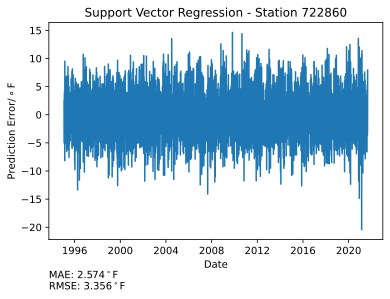

In [7]:
from sklearn.svm import SVR

X = gsod.sliding_window(np.asarray(filled["TEMP"]), 7)[:-1]
Y = np.asarray(filled["TEMP"])[7:]
length = len(X)

model = SVR(C=1.0, epsilon=0.2)
model.fit(X[:int(length * 0.7)], Y[:int(length * 0.7)])

Ypredict = model.predict(X[int(length * 0.7):])

plt.plot(filled.index[int(length * 0.7) + 7:], Ypredict - Y[int(length * 0.7):])
plt.xlabel("Date")
plt.ylabel("Prediction Error/${}\circ$F")
plt.title(f"Support Vector Regression - Station {STATION}")
plt.annotate(
    f"MAE: {np.average(np.abs(Ypredict - Y[int(length * 0.7):])):0.4}${{}}^\circ$F\n"
    + f"RMSE: {np.average((Ypredict - Y[int(length * 0.7):])**2)**0.5:0.4}${{}}^\circ$F",
    (0, -50),
    xycoords="axes points"
)